# 👻 회귀 (regression analysis)

## 👽 1. 상관분석과 회귀분석


### 1.1 상관분석

> 독립변수와 종속변수 간의 관계의 강도,  
즉 __얼마나 밀접하게 관련돼 있는지__ 를 분석하는 것  
상관성 유무만 확인할 뿐, 인과관계는 분석X



핵심은 **상관계수** 구하기  
* 상관계수(r) : 독립변수와 종속변수의 관계 정도를 -1과 1 사이로 정량화한 것  

<img src="https://mania.kr/g2/data/cheditor5/2002/view_thumbnail/mania-done-20200226124719_khlwxfkv.jpg" width ="600" height="320" alt="상관 계수" title="상관 계수">  
* 선형적 상관성이 클수록 상관관계가 강하다고 표현함  


### 1.2 회귀분석
> 독립변수와 종속변수의 상관 관계를 함수식으로 규명하는 것

결정계수(r^2) : 독립변수를 통한 종속변수 __예측이 얼마나 의미 있는 정보인지__ 를 판별함  
결정계수가 0.65보다 크거나 같으면 의미 있는 회귀식이라고 함  


___

## 👽 2. 선형 회귀
> 선형이라는 건 독립변수가 __1차항__ 으로 되어 있다는 의미

$$ f(x+y)=f(x)+f(y) $$
$$ f(ax)=af(x) $$

선형회귀식을 구할 때는 일반적으로 최소제곱법을 이용함  
최소제곱법 : 최적화 개념을 기반으로 한 것으로  
주어진 독립변수에 대해 어떤 함수식으로 예측한 __결과값과 실제값의 차이__ 를
__제곱해서 모두 더한 값__ 이 __최소__ 가 되는 함수식이 가장 타당한 회귀식이라는 이론  

  
독립변수의 수에 따라 `단순선형회귀`와 `다중선형회귀`로 구분함 

### 2.1 단순선형회귀(simple linear regression)

In [1]:
'''
단순선형회귀

키와 몸무게에 대한 데이터로

새로운 키가 주어졌을 때 몸무게 예측
'''
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url='https://raw.githubusercontent.com/lmyourGenie/MachineLearning_Study/master/basic_concept/resource/data1.csv'
df=pd.read_csv(url)
df.head()


height  weight
0  163.28   45.07
1  172.66   56.88
2  166.83   50.60
3  160.40   44.35
4  174.13   60.98

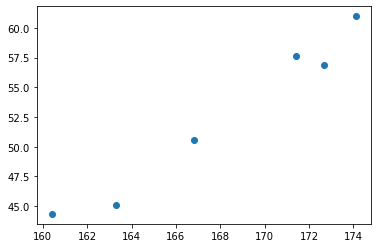

In [3]:
X=np.array(df['height'])
y=np.array(df['weight'])
plt.scatter(X,y)
plt.show()

In [4]:
#데이터 학습
line_fitter = LinearRegression()
line_fitter.fit(X.reshape(-1,1), y)

LinearRegression()

In [5]:
line_fitter.predict([[172.03]])  #키가 주어지면 몸무게를 알려줌

array([57.43932609])

In [6]:
line_fitter.coef_ #기울기

array([1.24161862])

In [7]:
line_fitter.intercept_ #절편

-156.15632437241558

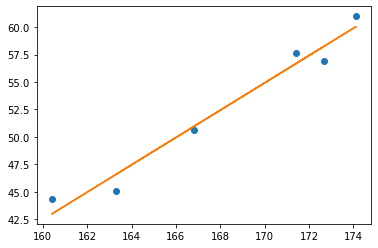

In [8]:
plt.plot(X, y, 'o')
plt.plot(X,line_fitter.predict(X.reshape(-1,1)))
plt.show()

<br/>

~~하쥐만 우리가 사는 세상은 단순회귀로 풀릴 만큼 그렇게 단순하지 않다. 고려해야 하는 변수 X가 하나가 아니라는 뜻😭~~  
<br/>

---

  

### 2.2 다중선형회귀(multiple linear regression)


In [9]:
'''
다중선형회귀

'''
from sklearn import linear_model
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [10]:
#데이터 직접 추가
data = {'x1' : [13, 18, 17, 20, 22, 21],  
       'x2' : [9, 7, 17, 11, 8, 10],
       'y' : [20, 22, 30, 27, 35, 32]}
# data 변수 안에 dictionary형태의 x1, x2, y key 이름을 가진 데이터를 생성

data = pd.DataFrame(data)                 
# data변수 안에 저장된 데이터를 pandas.DataFrame 함수를 통해 2차원의 수정 가능한 테이블 형태의 구조로 변경 후 data 변수에 저장

X = data[['x1', 'x2']]                   
# 독립변수들을 따로 변수에 저장. "data"데이터 프레임 안에 독립변수 "x1"과 "x2"를 "X"라는 변수에 저장.

y = data['y']
data

x1  x2   y
0  13   9  20
1  18   7  22
2  17  17  30
3  20  11  27
4  22   8  35
5  21  10  32

In [11]:
#데이터 학습
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = pd.DataFrame(X), y = y)
prediction = linear_regression.predict(X = pd.DataFrame(X))
print('a value = ', linear_regression.intercept_)
print('b value = ', linear_regression.coef_)
#하나의 a값에 두개의 b값이 출력됨

a value =  -7.35920177383591
b value =  [1.5443459  0.62472284]


In [12]:
# 적합도 검증 - 잔차
residuals = y-prediction
residuals.describe()

count    6.000000e+00
mean    -4.736952e-15
std      2.622371e+00
min     -3.399667e+00
25%     -1.987805e+00
50%      5.828714e-01
75%      1.415327e+00
max      3.385809e+00
Name: y, dtype: float64

In [13]:
# 적합도 검증 - 결정계수 r^2
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared = ', R_squared)

R_squared =  0.7969440176685233


In [14]:
#성능 평가
from sklearn.metrics import mean_squared_error
print('score = ', linear_regression.score(X =pd.DataFrame(X), y=y))
print('Mean_Squared_Error = ', mean_squared_error(prediction, y))
print('RMSE = ', mean_squared_error(prediction, y)**0.5)

# RMSE가 약 2.39로 오차 작음

score =  0.7969440176685233
Mean_Squared_Error =  5.730691056910563
RMSE =  2.393886182948254


---


## 👽 3. 로지스틱 회귀

---

<br/>


* 참고

| 라이브러리 | 설명 |
|:---: | :---: |
| Pandas | 행과 열로 이루어진 데이터 객체를 만들어 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터들을 처리하는데 매우 편리한 도구 |
| numpy | 다차원 배열을 처리하는데 필요한 여러 유용한 기능을 제공 |
| sklearn | 머신러닝 교육을 위한 파이썬 패키지 |
| train_test_split | 딥러닝을 제외하고도 다양한 기계학습과 데이터 분석 툴을 제공하는 scikit-learn 패키지 중 model_selection에 데이터 분할을 위한 함수 |
| statsmodels | 검정 및 추정 , 회귀분석, 시계열분석등의 다양한 통계분석 기능을 제공 |

<br/>
<br/>
<br/>


* 출처
파이썬을 이용한 데이터 분석